In [1]:
import matplotlib.pyplot as plt
import json
import os
# Function to extract values from the log file
def extract_values(file_path, key):
    values = []
    with open(file_path, 'r') as f:
        for line in f:
            if key in line:
                json_string = line.strip()
                data_dict = json.loads(json_string)
                value = data_dict[key]
                values.append(value)
    return values

# Function to plot the data
def plot_acc_data(file_path, x_key, y_key):
    x_values = extract_values(file_path, x_key)
    y_values = extract_values(file_path, y_key)

    # Plot "test_acc1" separately
    max_acc = max(y_values)
    max_epoch = [i for i, j in enumerate(y_values) if j == max_acc]
    plt.plot(x_values, y_values, label=y_key)
    for i,mark in enumerate(max_epoch):
        if i==0:
            plt.scatter(mark, max_acc, marker='o', color='r')
            plt.annotate(f"Max accuracy: {max_acc:.2f}%",
                                xy=(mark, max_acc),
                                xytext=(mark-5, max_acc+10),
                                arrowprops=dict(facecolor='black', shrink=0.05),
                                fontsize=12)
        else:
            plt.scatter(mark, max_acc, marker='o', color='r')
        
    plt.xlabel(x_key)
    plt.ylabel(y_key)
    plt.title(y_key)
    plt.legend()
    plt.show()
def plot_data(file_path, x_key, y_keys):
    x_values = extract_values(file_path, x_key)

    fig, ax = plt.subplots()

    # Plot each y_key in the same plot
    for y_key in y_keys:
        y_values = extract_values(file_path, y_key)
        ax.plot(x_values, y_values, label=y_key)

    ax.set_xlabel(x_key)
    ax.legend()
    plt.show()



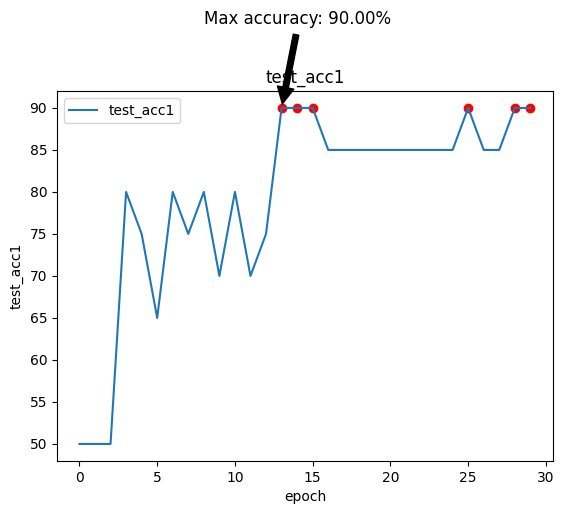

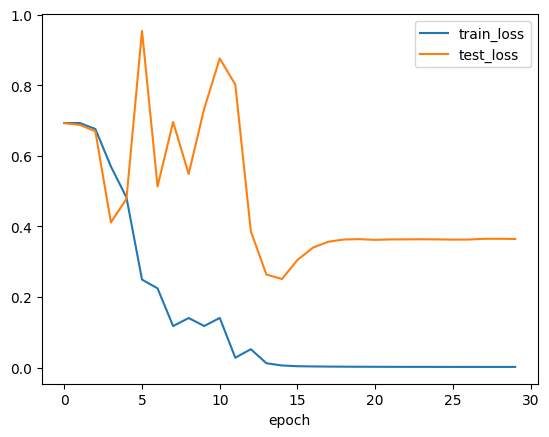

In [3]:
file_path=os.path.join('/data/jongseo/project/asd/imae/result/kfold/base/hand/5e-3/OUT/0','log.txt')
x_key='epoch'
plot_acc_data(file_path, x_key, 'test_acc1')

y_keys=['train_loss','test_loss']
plot_data(file_path, x_key, y_keys)
